```
/* output level entries (envelope,sinwave) */
/* envelope counter lower bits */
#define ENV_BITS 16
/* envelope output entries */
#define EG_ENT   4096
/* used dynamic memory = EG_ENT*4*4(byte)or EG_ENT*6*4(byte) */
/* used static  memory = EG_ENT*4 (byte)                     */

#define EG_OFF   ((2*EG_ENT)<<ENV_BITS)  /* OFF          */
#define EG_DED   EG_OFF
#define EG_DST   (EG_ENT<<ENV_BITS)      /* DECAY  START */
#define EG_AED   EG_DST
#define EG_AST   0                       /* ATTACK START */

#define EG_STEP (96.0/EG_ENT) /* OPL is 0.1875 dB step  */


	/* envelope counter -> envelope output table */
	for (i=0; i<EG_ENT; i++)
	{
		/* ATTACK curve */
		pom = pow( ((double)(EG_ENT-1-i)/EG_ENT) , 8 ) * EG_ENT;
		/* if( pom >= EG_ENT ) pom = EG_ENT-1; */
		ENV_CURVE[i] = (int)pom;
		/* DECAY ,RELEASE curve */
		ENV_CURVE[(EG_DST>>ENV_BITS)+i]= i;
	}
	/* off */
	ENV_CURVE[EG_OFF>>ENV_BITS]= EG_ENT-1;
```


In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

ENV_BITS = 16
EG_ENT = 4096.0

pom = np.minimum(EG_ENT-1, np.power((EG_ENT-1.0-np.arange(EG_ENT)) / EG_ENT, 8) * EG_ENT)

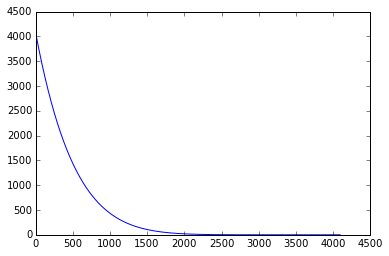

In [2]:
plt.plot(pom)

[1018 1013 1007 1002  996  991  986  980  975  969  964  959  953  948  942
  937  932  927  921  916  911  906  900  895  890  885  880  874  869  864
  859  854  849  844  839  834  829  824  819  814  809  804  799  794  789
  784  779  774  770  765  760  755  750  745  741  736  731  726  722  717
  712  708  703  698  693  689  684  680  675  670  666  661  657  652  648
  643  639  634  630  625  621  616  612  607  603  599  594  590  585  581
  577  572  568  564  560  555  551  547  542  538  534  530  526  521  517
  513  509  505  501  496  492  488  484  480  476  472  468  464  460  456
  452  448  444  440  436  432  428  424  420  416  412  409  405  401  397
  393  389  385  382  378  374  370  367  363  359  355  352  348  344  340
  337  333  329  326  322  318  315  311  308  304  300  297  293  290  286
  283  279  276  272  268  265  262  258  255  251  248  244  241  237  234
  231  227  224  220  217  214  210  207  204  200  197  194  190  187  184
  181  177  

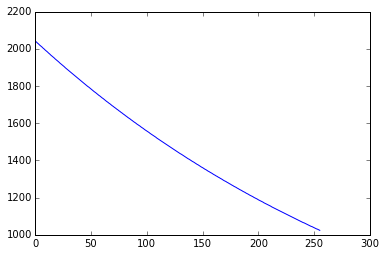

In [3]:
# can we go backwards to the log-sin table from the samples we have?
# we have the original mantissa and exponent...
exptbl = np.round((np.power(2, (255 - np.arange(256))/256.0))*1024).astype(np.int32)
logsintbl = np.round(-np.log(np.sin((np.arange(512)+0.5) * np.pi / 512)) / np.log(2) * 256).astype(np.int32)
plt.plot(exptbl)
print exptbl - 1024

In [4]:
logsintbl = np.round(-np.log(np.sin((np.arange(512)+0.5) * np.pi / 512)) / np.log(2) * 256).astype(np.int32)
#print logsintbl
print exptbl

[2042 2037 2031 2026 2020 2015 2010 2004 1999 1993 1988 1983 1977 1972 1966
 1961 1956 1951 1945 1940 1935 1930 1924 1919 1914 1909 1904 1898 1893 1888
 1883 1878 1873 1868 1863 1858 1853 1848 1843 1838 1833 1828 1823 1818 1813
 1808 1803 1798 1794 1789 1784 1779 1774 1769 1765 1760 1755 1750 1746 1741
 1736 1732 1727 1722 1717 1713 1708 1704 1699 1694 1690 1685 1681 1676 1672
 1667 1663 1658 1654 1649 1645 1640 1636 1631 1627 1623 1618 1614 1609 1605
 1601 1596 1592 1588 1584 1579 1575 1571 1566 1562 1558 1554 1550 1545 1541
 1537 1533 1529 1525 1520 1516 1512 1508 1504 1500 1496 1492 1488 1484 1480
 1476 1472 1468 1464 1460 1456 1452 1448 1444 1440 1436 1433 1429 1425 1421
 1417 1413 1409 1406 1402 1398 1394 1391 1387 1383 1379 1376 1372 1368 1364
 1361 1357 1353 1350 1346 1342 1339 1335 1332 1328 1324 1321 1317 1314 1310
 1307 1303 1300 1296 1292 1289 1286 1282 1279 1275 1272 1268 1265 1261 1258
 1255 1251 1248 1244 1241 1238 1234 1231 1228 1224 1221 1218 1214 1211 1208
 1205 1201 1

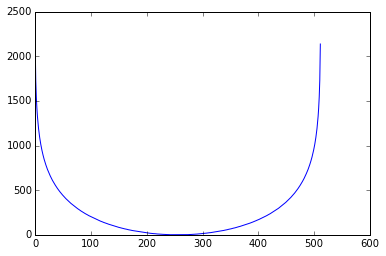

In [5]:
plt.plot(logsintbl)

```
/* attack/decay rate time rate */
#define OPL_ARRATE     141280  /* RATE 4 =  2826.24ms @ 3.6MHz */
#define OPL_DRRATE    1956000  /* RATE 4 = 39280.64ms @ 3.6MHz */

// OPL->rate is the output samplerate
// OPL->clock is ... 3579545 (14.31818MHz / 4)
// so if OPL->rate is 49715, (OPL->clock / OPL->rate) = 72; if OPL->rate lower then OPL->freqbase is > 1

// let's compute assuming freqbase is 1

	OPL->freqbase = (OPL->rate) ? ((double)OPL->clock / OPL->rate) / 72  : 0;


	/* make attack rate & decay rate tables */
	for (i = 0;i < 4;i++) OPL->AR_TABLE[i] = OPL->DR_TABLE[i] = 0;
	for (i = 4;i <= 60;i++){
		rate  = OPL->freqbase;						/* frequency rate */
		if( i < 60 ) rate *= 1.0+(i&3)*0.25;		/* b0-1 : x1 , x1.25 , x1.5 , x1.75 */
		rate *= 1<<((i>>2)-1);						/* b2-5 : shift bit */
		rate *= (double)(EG_ENT<<ENV_BITS);
		OPL->AR_TABLE[i] = rate / ARRATE;
		OPL->DR_TABLE[i] = rate / DRRATE;
	}
	for (i = 60;i < 76;i++)
	{
		OPL->AR_TABLE[i] = EG_AED-1;
		OPL->DR_TABLE[i] = OPL->DR_TABLE[60];
	}
```

In [6]:
i = np.arange(4, 60)
rate = (1.0 + (i&3) * 0.25) * (1 << ((i >> 2) - 1)) * (4096) / 141280
print rate

[  2.89920725e-02   3.62400906e-02   4.34881087e-02   5.07361268e-02
   5.79841450e-02   7.24801812e-02   8.69762174e-02   1.01472254e-01
   1.15968290e-01   1.44960362e-01   1.73952435e-01   2.02944507e-01
   2.31936580e-01   2.89920725e-01   3.47904870e-01   4.05889015e-01
   4.63873160e-01   5.79841450e-01   6.95809740e-01   8.11778029e-01
   9.27746319e-01   1.15968290e+00   1.39161948e+00   1.62355606e+00
   1.85549264e+00   2.31936580e+00   2.78323896e+00   3.24711212e+00
   3.71098528e+00   4.63873160e+00   5.56647792e+00   6.49422424e+00
   7.42197055e+00   9.27746319e+00   1.11329558e+01   1.29884485e+01
   1.48439411e+01   1.85549264e+01   2.22659117e+01   2.59768969e+01
   2.96878822e+01   3.71098528e+01   4.45318233e+01   5.19537939e+01
   5.93757644e+01   7.42197055e+01   8.90636467e+01   1.03907588e+02
   1.18751529e+02   1.48439411e+02   1.78127293e+02   2.07815176e+02
   2.37503058e+02   2.96878822e+02   3.56254587e+02   4.15630351e+02]


[   1    1    1    5   13   29   59  109  189  303  469  677  937 1242 1574
 1958 2380 2828 3292 3748 4184 4552 4968 5304 5656 6040 6296 6584 6872 7176
 7336 7496 7656 7832 7992 8168 8168 8168 8168 8168 8168 8168 8168 8168 8168
 8168 8168 8168 8168 8168 8168 8168 8168 8168 8168 8168 8168 8168 8168]


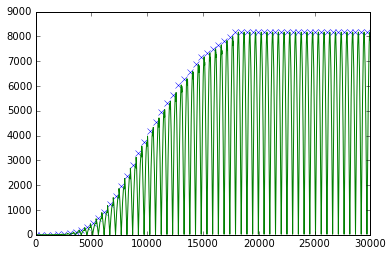

In [7]:
sample = np.frombuffer(open("samples/adsr4f0f.bin").read()[8:], np.uint16) >> 3
s = (((sample & 1023).astype(np.int32) - 512)*2+1) << ((sample >> 10) - 1)
env = s[256::512]
plt.plot(np.arange(len(env))* 512, env, 'x')
print env
plt.plot(s)

25 75
[  25   75  125  175  225  275  325  377  427  477  527  577  625  677  727
  777  827  875  927  975 1026 1074 1126 1174 1226 1274 1326 1374 1422 1474
 1522 1570 1618 1666 1718 1766 1814 1862 1914 1962 2010 2060 2108 2156 2204
 2252 2300 2348 2396 2444 2492 2540 2588 2636 2684 2732 2772 2828 2876 2924
 2964 3012 3060 3100 3148 3196 3244 3292 3332 3380 3428 3476 3524 3556 3604
 3660 3700 3740 3788 3828 3868 3924 3964 4012 4052 4104 4136 4184 4216 4264
 4312 4344 4392 4440 4488 4520 4568 4600 4648 4696 4728 4776 4808 4840 4888
 4920 4968 5000 5048 5096 5128 5176 5208 5240 5288 5320 5352 5400 5432 5480
 5512 5544 5576 5624 5656 5688 5736 5768 5800 5832 5880 5912 5944 5976 6008
 6040 6072 6104 6136 6168 6200 6232 6264 6296 6344 6376 6392 6424 6456 6488
 6520 6552 6584 6616 6632 6664 6696 6728 6760 6776 6824 6840 6872 6888 6904
 6952 6968 7000 7016 7048 7080 7096 7112 7160 7176 7192 7208 7240 7272 7288
 7320 7336 7352 7368 7400 7416 7432 7448 7480 7496 7512 7528 7560 7576 7592
 7624 

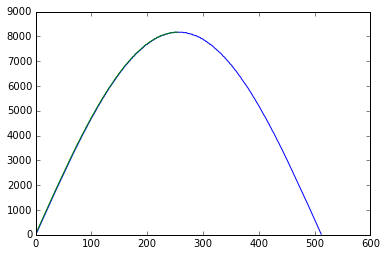

In [8]:
plt.plot(s[512*50 + 1:512*51 + 1 + 1])
print s[512*50+2], s[512*51+3]
# how did these values arise?
# internally, it's doing something along the lines of pow2(sintbl[x] + volume)
# we should be able to find the phase offset x to the exact sample
offset = 2
# found, it seems there was a 1-sample delay
x = np.arange(256)
plt.plot(4*exptbl[logsintbl[x] & 255] >> (logsintbl[x] >> 8))
print s[512*50 + 2:512*50 + 256+2]
print (4*exptbl[logsintbl[x] & 255] >> (logsintbl[x] >> 8)) | ((logsintbl[x] >> 8) >= 1).astype(np.uint16)
print logsintbl[x] >> 8
#print 4*exptbl[logsintbl[256] & 255] >> (logsintbl[256] >> 8)
# ahha! 8168 is actually the maximum we can synthesize!
# ahha, if exponent < 1, then we only have 9 bits of precision and we need to set the LSB!

# so now, let's get the plausible range of integer volumes for each possible sample
# exptbl[0]* 4 = 8168
# so what we are seeing is 4*((exptbl[0] + vol) & 255) >> (vol >> 8)
vol = np.arange(4096)
voltbl = 4*(exptbl[vol & 255]) >> (vol >> 8)

In [9]:
# 8152 instead of 8148
#(sample & 1023).astype(np.int32) - 512)*2+1) << ((sample >> 10) - 1)
#8168 =
((1022 - 512)*2+1) << 3
# so internally there's some algorithm to get the closest ym3014b float
# because our dynamic range in positive numbers is only 9 bits, really, because of signedness

# we would have been using the exponent (bits 8..10) and mantissa (bits 0..7) all along
# initially i had 4*((exptbl[x]) & 255) >> (x >> 8)
# but that isn't right
#     int lookupExp(int val) {
#        bool sign = val & 0x8000;
#        int t = (expTable[(val & 255) ^ 255] | 1024) << 1;
#        int result = t >> ((val & 0x7F00) >> 8);
#        if (sign) result = ~result;
#        return result >> 4;
#    }

def lookupExp(val):
    sign = val & 0x8000;
    t = exptbl[val & 255] << 1
    result = t >> ((val & 0x7f00) >> 8)
    if (sign):
        result = ~result
    return result >> 4

lookupExp(1)

254

In [10]:
def volrange(x):
    idx = np.where(voltbl == x)[0]
    return np.min(idx), np.max(idx)

print voltbl[:258]

[8168 8148 8124 8104 8080 8060 8040 8016 7996 7972 7952 7932 7908 7888 7864
 7844 7824 7804 7780 7760 7740 7720 7696 7676 7656 7636 7616 7592 7572 7552
 7532 7512 7492 7472 7452 7432 7412 7392 7372 7352 7332 7312 7292 7272 7252
 7232 7212 7192 7176 7156 7136 7116 7096 7076 7060 7040 7020 7000 6984 6964
 6944 6928 6908 6888 6868 6852 6832 6816 6796 6776 6760 6740 6724 6704 6688
 6668 6652 6632 6616 6596 6580 6560 6544 6524 6508 6492 6472 6456 6436 6420
 6404 6384 6368 6352 6336 6316 6300 6284 6264 6248 6232 6216 6200 6180 6164
 6148 6132 6116 6100 6080 6064 6048 6032 6016 6000 5984 5968 5952 5936 5920
 5904 5888 5872 5856 5840 5824 5808 5792 5776 5760 5744 5732 5716 5700 5684
 5668 5652 5636 5624 5608 5592 5576 5564 5548 5532 5516 5504 5488 5472 5456
 5444 5428 5412 5400 5384 5368 5356 5340 5328 5312 5296 5284 5268 5256 5240
 5228 5212 5200 5184 5168 5156 5144 5128 5116 5100 5088 5072 5060 5044 5032
 5020 5004 4992 4976 4964 4952 4936 4924 4912 4896 4884 4872 4856 4844 4832
 4820 4804 4

In [11]:
print np.max(np.abs(s)), np.max(env)
plt.show()
envtable = -256*np.log(env [3:36]/ float(np.max(env))) / np.log(2)
#plt.plot(envtable, '-x')
print(envtable[1:] / envtable[:-1])
#print env[3:2+34] - env[2:2+33]
print envtable

8168 8168
[ 0.87085138  0.87547063  0.8740859   0.875506    0.87249337  0.87467959
  0.86738395  0.87153653  0.86948924  0.86985845  0.8742251   0.86742204
  0.86335023  0.86013627  0.85676244  0.85724335  0.8587354   0.87398435
  0.85042411  0.86837687  0.85117831  0.82126312  0.86246607  0.828174
  0.80140829  0.74945178  0.82969357  0.79916466  0.75400124  0.64890009
  0.51856755 -0.        ]
[ 2732.50279833  2379.60382278  2083.27325587  1820.95976999  1594.26120348
  1390.98233002  1216.66385086  1055.31469782   919.74531259   799.70864978
   695.63332932   608.14011529   527.51413793   455.42945093   391.73139099
   335.6207438    287.70864978   247.06560375   215.93147099   183.63332932
   159.46293524   135.73139099   111.47118507    96.14011529    79.6207438
    63.80872441    47.82156185    39.67724218    31.70864978    23.90836132
    15.51413793     8.04512847    -0.        ]


[2477 2124 1828 1566 1339 1136  961  800  664  544  440  353  272  200  136
   80   32   -7  -38  -71  -95 -119 -143 -158 -175 -191 -207 -215 -223 -231
 -239 -246 -254]


/Users/andy/.py/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


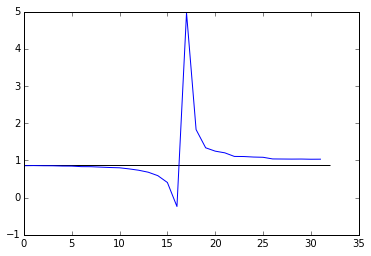

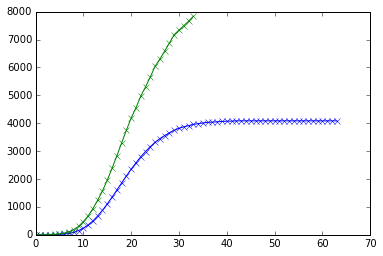

In [12]:
le = -256*np.log(env[3:36] / 4096.0) / np.log(2)
plt.plot(le[1:] / le[:-1])
plt.hlines(0.875, 0, 32)
#plt.plot(le)
#plt.plot(logsintbl[:256:4])
print le.astype(np.int)
atbl = []
a = 2666
for _ in range(32):
    atbl.append(a)
    if (a > 8):
        a -= a >> 3
    else:
        a -= 1
plt.show()
#plt.plot(le)
#plt.plot(atbl)

powcurve = (4096 * np.power(1.0 - np.arange(64) / 64.0, 8)).astype(np.int16)
plt.plot(2*(exptbl[powcurve & 255]) >> (powcurve >> 8), '-x')
plt.plot(env[0:34], '-x')

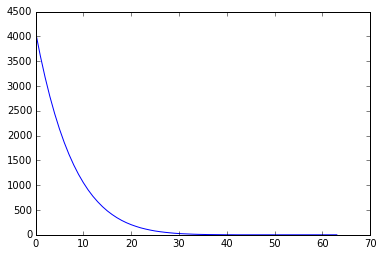

In [13]:
plt.plot(powcurve)

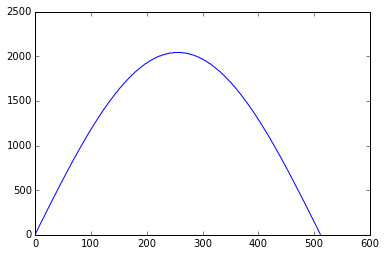

In [14]:
plt.plot((exptbl[logsintbl & 255]) >> (logsintbl >> 8))

In [15]:
logsintbl[:256]

array([2137, 1731, 1543, 1419, 1326, 1252, 1190, 1137, 1091, 1050, 1013,
        979,  949,  920,  894,  869,  846,  825,  804,  785,  767,  749,
        732,  717,  701,  687,  672,  659,  646,  633,  621,  609,  598,
        587,  576,  566,  556,  546,  536,  527,  518,  509,  501,  492,
        484,  476,  468,  461,  453,  446,  439,  432,  425,  418,  411,
        405,  399,  392,  386,  380,  375,  369,  363,  358,  352,  347,
        341,  336,  331,  326,  321,  316,  311,  307,  302,  297,  293,
        289,  284,  280,  276,  271,  267,  263,  259,  255,  251,  248,
        244,  240,  236,  233,  229,  226,  222,  219,  215,  212,  209,
        205,  202,  199,  196,  193,  190,  187,  184,  181,  178,  175,
        172,  169,  167,  164,  161,  159,  156,  153,  151,  148,  146,
        143,  141,  138,  136,  134,  131,  129,  127,  125,  122,  120,
        118,  116,  114,  112,  110,  108,  106,  104,  102,  100,   98,
         96,   94,   92,   91,   89,   87,   85,   

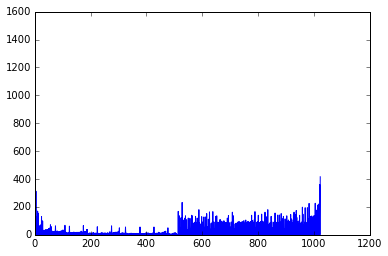

In [16]:
plt.plot(np.histogram(sample & 511, bins=1024)[0])

In [17]:
np.argmax(np.correlate(s, np.sin(np.arange(1024) * np.pi / 512))) & 1023


694

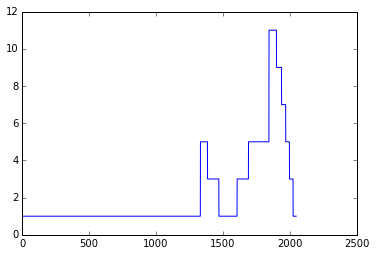

In [18]:
plt.plot(s[:2048])

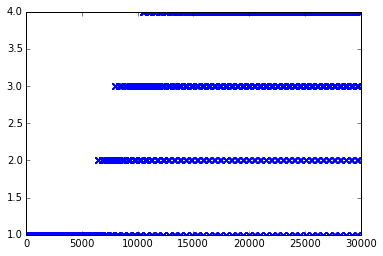

In [19]:
plt.plot(sample >> 10, 'x')

In [20]:
33 * 512

16896

In [21]:
141280

141280

In [22]:
# we have a value x = log2(y); y = 2**x
# we want y', which is the YM3804 representation of y
# which has exponent e and mantissa m

# y = exptbl[x&255] << (x>>8)
# but! y can be positive or negative
# and ym3812 y' = (-1024 + (m<<1) + 1) << (e - 1)
# m is 10 bits max
# e is 1..7

# exponent comes from exptbl... except we need to accomodate negative numbers by adding 1024
# and fixing the exponent if it overflows

# i think adding 1024 is the key part to making this work like we expect


In [23]:
ss = (((sample & 1023)<<1) - 1023) << ((sample >> 10) - 1)
print ss[512*50 + 2:512*50 + 256+2]
#print sample[512*50:512*50+100]
print sample[512*50+2:512*50+100] & 1023
print sample[512*50+2:512*50+100] >> 10

[  25   75  125  175  225  275  325  377  427  477  527  577  625  677  727
  777  827  875  927  975 1026 1074 1126 1174 1226 1274 1326 1374 1422 1474
 1522 1570 1618 1666 1718 1766 1814 1862 1914 1962 2010 2060 2108 2156 2204
 2252 2300 2348 2396 2444 2492 2540 2588 2636 2684 2732 2772 2828 2876 2924
 2964 3012 3060 3100 3148 3196 3244 3292 3332 3380 3428 3476 3524 3556 3604
 3660 3700 3740 3788 3828 3868 3924 3964 4012 4052 4104 4136 4184 4216 4264
 4312 4344 4392 4440 4488 4520 4568 4600 4648 4696 4728 4776 4808 4840 4888
 4920 4968 5000 5048 5096 5128 5176 5208 5240 5288 5320 5352 5400 5432 5480
 5512 5544 5576 5624 5656 5688 5736 5768 5800 5832 5880 5912 5944 5976 6008
 6040 6072 6104 6136 6168 6200 6232 6264 6296 6344 6376 6392 6424 6456 6488
 6520 6552 6584 6616 6632 6664 6696 6728 6760 6776 6824 6840 6872 6888 6904
 6952 6968 7000 7016 7048 7080 7096 7112 7160 7176 7192 7208 7240 7272 7288
 7320 7336 7352 7368 7400 7416 7432 7448 7480 7496 7512 7528 7560 7576 7592
 7624 7640 7

In [24]:
def logtoym3804(l):
    lm = exptbl[l & 255]
    le = (l >> 8)
    e = np.maximum(1, 4 - le)
    m = ((lm >> (le + e - 3)) + 1024) >> 1
    return m, e

#print m, e

def ym3804tolinear(m, e):
    return (2*m - 1023) << (e - 1)

volm, vole = logtoym3804(logsintbl[256] + np.arange(4096))
voltbl = (vole << 10) + volm
print ym3804tolinear(*logtoym3804(logsintbl[256] + 1000))

545


[3072, 3072, 3072, 2666, 2353, 2071, 1815, 1592, 1390, 1216, 1055, 920, 800, 696, 608, 528, 456, 392, 336, 288, 247, 216, 184, 160, 136, 112, 96, 80, 64, 48, 40, 32, 24, 16, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4095, 4095, 4095, 2815, 2409, 2096, 1827, 1597, 1393, 1218, 1056, 920, 800, 696, 608, 528, 456, 392, 336, 288, 248, 216, 184, 160, 136, 112, 96, 80, 64, 48, 40, 32, 24, 16, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[511 511 511 351 301 262 228 199 174 152 132 115 100  87  76  66  57  49
  42  36  31  27  23  20  17  14  12  10   8   6   5   4   3   2   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]
[384 384 384 333 294 258 226 199 173 152 131 115 100  87  76  66  57  49
  42  36  30  27  23  20  17  14  12  10   8   6   5   4   3   2   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]


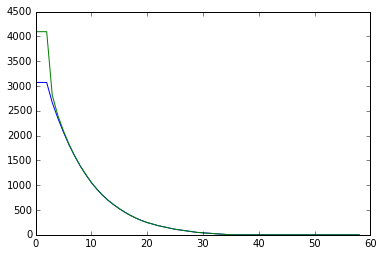

In [25]:
def volrange(value):
    range = np.where(voltbl == value)[0]
    return np.min(range), np.max(range)

mn, mx = [], []
for s in sample[256::512]:
    mm = volrange(s)
    mn.append(mm[0])
    mx.append(mm[1])

plt.plot(mn)
plt.plot(mx)

volrange(sample[512*4+256])
print mn
print mx
print np.array(mx) / 8
print np.array(mn) / 8

In [26]:
print (np.array(mx)[1:] / 8) - (np.array(mx)[:-1]/8)

[   0    0 -160  -50  -39  -34  -29  -25  -22  -20  -17  -15  -13  -11  -10
   -9   -8   -7   -6   -5   -4   -4   -3   -3   -3   -2   -2   -2   -2   -1
   -1   -1   -1   -1   -1    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [36]:
attack_volume = []
x = 512
while x > 0:
    attack_volume.append(x*8)
    x -= (x >> 3) + 1
    #print x
attack_volume.append(0)
print attack_volume

# backwards
# x' = x - (x>>3) - 1
# x = x' + (x>>3) + 1
print len(attack_volume)

[4096, 3576, 3128, 2736, 2392, 2088, 1824, 1592, 1392, 1216, 1056, 920, 800, 696, 608, 528, 456, 392, 336, 288, 248, 216, 184, 160, 136, 112, 96, 80, 64, 48, 40, 32, 24, 16, 8, 0]
36


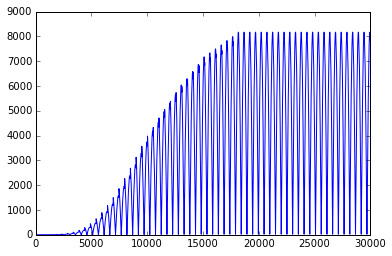

In [33]:
sample = np.frombuffer(open("samples/adsr4f0f.bin").read()[8:], np.uint16) >> 3
s = (((sample & 1023).astype(np.int32) - 512)*2+1) << ((sample >> 10) - 1)
#env = s[256::512]
#plt.plot(np.arange(len(env))* 512, env, 'x')
#print env
plt.plot(s)

In [34]:
512 << 4

8192

In [35]:
1 << 13

8192

In [ ]:
# ok, i need to get some more good samples now with release included to see how long the peak
# attack volume is hit